

# Investigating the Tmdb dataset
> The tmdb dataset is sourced from the tmdb website and contains several distinguishing features for each filim released over the years from 1960 to 2015.

>I am going to base my analysis on the following columns
<ul>
    <li>popularity</li>
    <li>Budget</li>
    <li>Revenue</li>
    <li>genres</li>
    <li>Rerlease Year</li>
    <li>Vote_count</li>

</ul>

## I am going to try and answer the following questions in my analysis.

_What kind of genres where most popular in the year 2014 ?_<br/>
_What does the distribution of the releases of filims look like over the course of 1960 - 2015 ?_ <br/>
_What are the factors that are most correlated to a filim's revenue ?_

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 

In [1]:
#importing all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_movies = pd.read_csv("tmdb-movies.csv") 
df_movies.head(1)#printing just the first row

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df_movies.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:

#   types and look for instances of missing or possibly errant data.
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## the most number of missing values are in the homepage column which makes sense because most movies would be low budget productions without their own websites

In [5]:
#Let us drop all NA values from our datset
df_movies.dropna(inplace=True)
df_movies.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [6]:
#let us find if therer are repaeted rows
df_movies.duplicated().sum()


0

In [7]:
#so no duplicates. ow finding the shape of the dataset
df_movies.shape

(1992, 21)

<P>splitting all the types of generes into its own columns</p>

In [8]:
df_movies[[0,1,2,3,4]] = df_movies.genres.str.split("|",expand=True) 
df_movies.drop(columns=["genres"],axis=1)#removing the genres because it is redundant at this point

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy,Animation,Family,None,None


In [9]:
#finding all the unique genres of movies
uniques = pd.unique(df_movies[[0,1,2,3,4]].values.ravel())

In [10]:
# these are all the uniquegenres in our dataset
uniques

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', None,
       'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation',
       'Comedy', 'Mystery', 'War', 'Romance', 'History', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)



### changing the release date to be a datetime datatype

In [11]:
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
0                        object
1                        object
2                        object
3                        object
4                        object
dtype: object

In [12]:
#release dates should be a date time object
df_movies.release_date = pd.to_datetime(df_movies.release_date)

<a id='eda'></a>
## Exploratory Data Analysis



let us see the distribution of movies released over the years


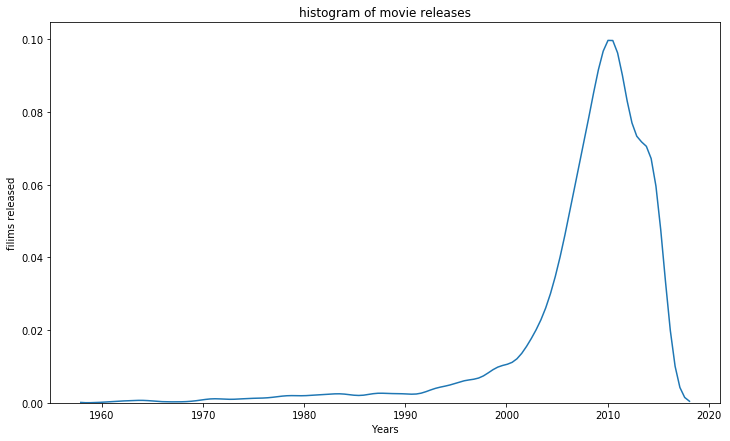

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title("histogram of movie releases")
sns.distplot(df_movies["release_year"],hist=False)
plt.xlabel("Years");
plt.ylabel("filims released");

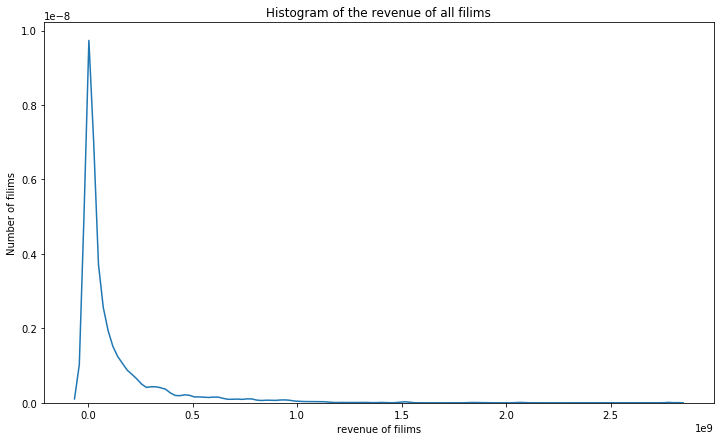

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(df_movies["revenue"],hist=False);
plt.title("Histogram of the revenue of all filims")
plt.xlabel("revenue of filims");
plt.ylabel("Number of filims");

> most movies only generate small revenues

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


## Finding the most popular genre in the year 2014

In [16]:
df_m_2014 = df_movies.query("release_year=='2014'") #subsetting the dataset into only the year 2014

In [17]:
new_data = pd.DataFrame(df_m_2014[0].value_counts())

In [18]:
# #finding the value counts of all unique values in the 0 and 1 column
new_data = pd.DataFrame(df_m_2014[0].value_counts())
new_data = pd.concat([new_data, pd.DataFrame(df_m_2014[1].value_counts())], axis=1,sort=True)

doing the same for all other genre columns

In [19]:
new_data = pd.concat([new_data,pd.DataFrame(df_m_2014[2].value_counts())],axis=1,sort=True)

In [20]:
new_data = pd.concat([new_data,pd.DataFrame(df_m_2014[3].value_counts())],axis=1,sort=True)

In [21]:
new_data = pd.concat([new_data,pd.DataFrame(df_m_2014[4].value_counts())],axis=1,sort=True)

In [22]:
# creating a column for the sum of all the instances of a genre in the movies
new_data["sum"]  = new_data[0]+new_data[1]+new_data[2]+new_data[3]+new_data[4]

In [23]:
new_data.head()

,0,1,2,3,4,sum
Action,19.0,13.0,6.0,2.0,1.0,41.0
Adventure,9.0,11.0,6.0,NaN,NaN,NaN
Animation,3.0,3.0,2.0,1.0,NaN,NaN
Comedy,14.0,13.0,4.0,1.0,3.0,35.0
Crime,5.0,2.0,6.0,1.0,NaN,NaN


## There seems to be some NAN values mostly because not all movies have four types of genre and if the movie has only three genres then the last column becomes a nan

In [24]:
#let us replace the NAN with zeroes because we are interested in adding them and zero does not afffect addition
new_data.fillna(0,inplace=True)
#recalculating the sum to remove nan
new_data["sum"]  = new_data[0]+new_data[1]+new_data[2]+new_data[3]+new_data[4]
new_data

,0,1,2,3,4,sum
Action,19.0,13.0,6.0,2.0,1.0,41.0
Adventure,9.0,11.0,6.0,0.0,0.0,26.0
Animation,3.0,3.0,2.0,1.0,0.0,9.0
Comedy,14.0,13.0,4.0,1.0,3.0,35.0
Crime,5.0,2.0,6.0,1.0,0.0,14.0
Documentary,9.0,0.0,0.0,0.0,0.0,9.0
Drama,30.0,22.0,2.0,4.0,0.0,58.0
Family,6.0,3.0,0.0,3.0,0.0,12.0
Fantasy,5.0,7.0,4.0,1.0,0.0,17.0
History,1.0,2.0,1.0,0.0,0.0,4.0


In [25]:
# we got what we needed but not in the right order
#to get the sum column in an increasing trend we have used the sort_values method
#in order to do that lets create a function to do it for us
def increasing_order(col):
    return new_data.sort_values(by=col)


In [26]:
increasing_order("sum")

,0,1,2,3,4,sum
Western,0.0,1.0,0.0,0.0,0.0,1.0
TV Movie,0.0,2.0,0.0,0.0,0.0,2.0
History,1.0,2.0,1.0,0.0,0.0,4.0
War,3.0,3.0,0.0,1.0,0.0,7.0
Documentary,9.0,0.0,0.0,0.0,0.0,9.0
Music,2.0,4.0,3.0,0.0,0.0,9.0
Animation,3.0,3.0,2.0,1.0,0.0,9.0
Mystery,1.0,3.0,4.0,1.0,2.0,11.0
Family,6.0,3.0,0.0,3.0,0.0,12.0
Romance,7.0,2.0,1.0,1.0,1.0,12.0


## The most popular genre in 2014 is drama
## which is cool because i thought it would be action ;)

### What are the factors influencing the revenue of a movie
> there seems to be a lot of columns that look similar to each other so we are going to remove that

In [27]:
df_movies.drop(columns=["revenue_adj","budget_adj","id"],axis=1,inplace=True)
correlation = df_movies.corr()
df_movies.columns

Index([             'imdb_id',           'popularity',               'budget',
                    'revenue',       'original_title',                 'cast',
                   'homepage',             'director',              'tagline',
                   'keywords',             'overview',              'runtime',
                     'genres', 'production_companies',         'release_date',
                 'vote_count',         'vote_average',         'release_year',
                            0,                      1,                      2,
                            3,                      4],
      dtype='object')

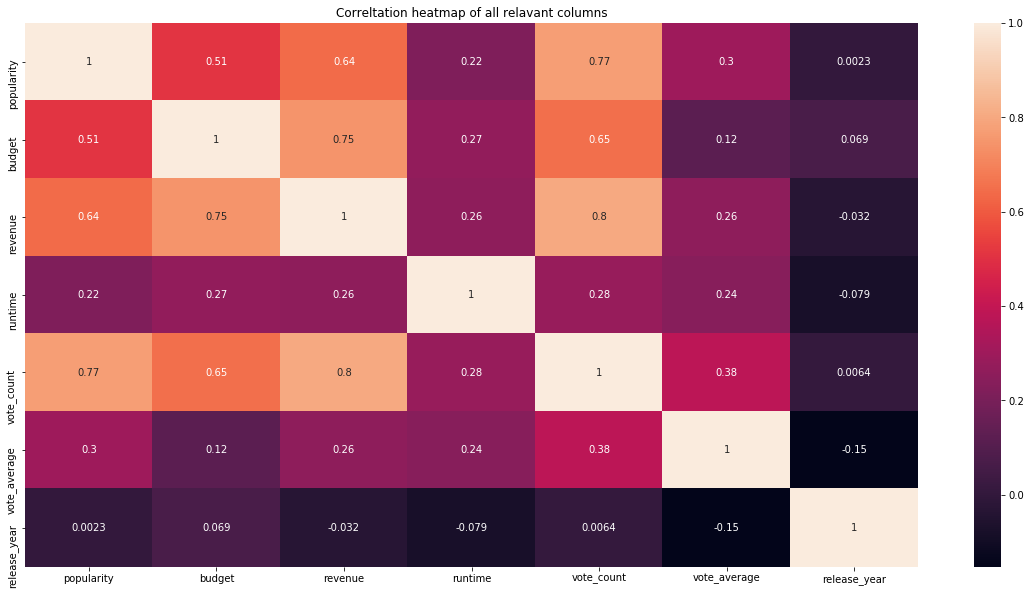

In [32]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(correlation,annot=True);
plt.title("Correltation heatmap of all relavant columns");

## we have created a heatmap of all the selected features in our dataset
> a heatmap shows us  how each column is correlated to each other based on how bright or dark the colour is shown or on the magnitude annotated upon the heatmap.

>based upon the heatmap it is clear that :<br/>
**_Popularity is clearly positively correlated with the budget of a filim_**<br/>
**_The revenue is highly related to its vote count_**


<a id='conclusions'></a>
## Conclusions

>the frequency of movie releases seem to be on an upward moving trend with respect to time

>the most popular filim genre in 2014 is Drama

>the features influencing the revenue of a movie are vote_count,popularity,and budget of a movie

## limitations
> the largest limitations is the fact that i have removed filims which have na in their features. Because of which a large number of filims which have no home page are removed.This might create an implicit bias towards movies with more financial resources who can create a website for their movies.

>The revenue eaned by filims have not beeen normalised nor has the inflation rate over the years been calculated and then adjusted for all movies.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0